In [31]:
from evo.tools import plot
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

import numpy as np
import pandas as pd

In [32]:
relative_path = "/media/timo/LaCie1/scannet/testtest/3d-vision/pipeline_outputs/"
scenes = ["2022-06-13_005810__run_stats"]

In [37]:
def get_data(scene):
    data_gt = pd.read_csv(relative_path+scene+".csv", sep=",", names=["idx","image_pair","3pt_up_R_err", \
        "3pt_up_t_err","3pt_up_min_iterations","3pt_up_max_epipolar_error","3pt_up_success_prob","3pt_up_refinements", \
        "3pt_up_iterations","3pt_up_num_inliers","3pt_up_inlier_ratio","3pt_up_model_score","5pt_R_err","5pt_t_err", \
        "5pt_min_iterations","5pt_max_epipolar_error","5pt_success_prob","5pt_refinements","5pt_iterations", \
        "5pt_num_inliers","5pt_inlier_ratio","5pt_model_score","input_gravity_err","absolute_translation"], \
        skiprows=1)
    
    return data_gt

# Benchmarking

In [38]:
def failure_metrics(data, name, threshold):
    samples_0_1 = sum(data<1)
    samples_1_3 = sum(data<3)
    samples_3_10 = sum(data<10)
    samples_10_20 = sum(data<20)
    
    failures = sum(data>=threshold)
    samples = len(data)
    data_in = data[data<=threshold].tolist()
    
    return samples, samples_0_1, samples_1_3, samples_3_10, samples_10_20, failures, data_in

In [39]:
samples_3pt_sum = 0
samples_0_1_3pt_sum = 0
samples_1_3_3pt_sum = 0
samples_3_10_3pt_sum = 0
samples_10_20_3pt_sum = 0
failures_3pt_sum = 0
data_3pt_sum = []
runtime_3pt_sum = 0

samples_5pt_sum = 0
samples_0_1_5pt_sum = 0
samples_1_3_5pt_sum = 0
samples_3_10_5pt_sum = 0
samples_10_20_5pt_sum = 0
failures_5pt_sum = 0
data_5pt_sum = []
runtime_5pt_sum = 0


for scene in scenes:
    data_gt = get_data(scene)
    samples_3pt, samples_0_1_3pt, samples_1_3_3pt, samples_3_10_3pt, samples_10_20_3pt, failures_3pt, data_3pt = \
        failure_metrics(data=data_gt["3pt_up_R_err"], name="gt 3pt_up_R_err", threshold=20)
    samples_5pt, samples_0_1_5pt, samples_1_3_5pt, samples_3_10_5pt, samples_10_20_5pt, failures_5pt, data_5pt = \
        failure_metrics(data=data_gt["5pt_R_err"], name="gt 5pt_up_R_err", threshold=20)
    
    samples_3pt_sum += samples_3pt
    samples_0_1_3pt_sum += samples_0_1_3pt
    samples_1_3_3pt_sum += samples_1_3_3pt
    samples_3_10_3pt_sum += samples_3_10_3pt
    samples_10_20_3pt_sum += samples_10_20_3pt
    failures_3pt_sum += failures_3pt
    data_3pt_sum.extend(data_3pt)
    
    samples_5pt_sum += samples_5pt
    samples_0_1_5pt_sum += samples_0_1_5pt
    samples_1_3_5pt_sum += samples_1_3_5pt
    samples_3_10_5pt_sum += samples_3_10_5pt
    samples_10_20_5pt_sum += samples_10_20_5pt
    failures_5pt_sum += failures_5pt
    data_5pt_sum.extend(data_5pt)


<IPython.core.display.Javascript object>


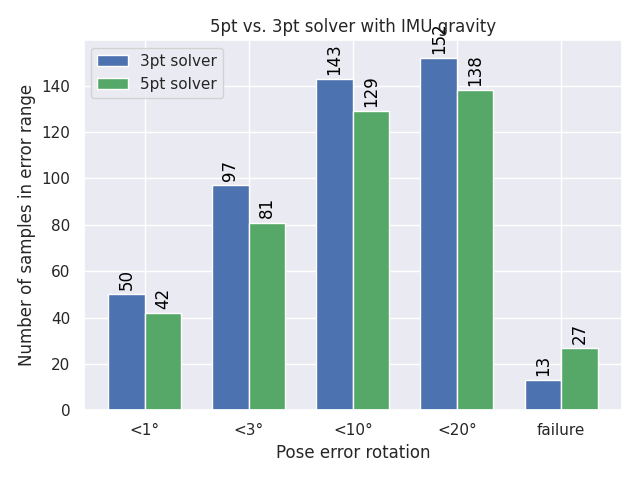

In [40]:
labels = ["<1°", "<3°", "<10°", "<20°", "failure"] #, "runtime"]
solver_3pt = [samples_0_1_3pt_sum, samples_1_3_3pt_sum, samples_3_10_3pt_sum, samples_10_20_3pt_sum, failures_3pt_sum] #, runtime_3pt_sum/samples_3pt_sum]
solver_5pt = [samples_0_1_5pt_sum, samples_1_3_5pt_sum, samples_3_10_5pt_sum, samples_10_20_5pt_sum, failures_5pt_sum] #, runtime_5pt_sum/samples_5pt_sum]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(dpi=100)
rects2 = ax.bar(x - width/2, solver_3pt, width, label='3pt solver')
rects1 = ax.bar(x + width/2, solver_5pt, width, label='5pt solver')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('5pt vs. 3pt solver with IMU gravity')
ax.set_ylabel('Number of samples in error range')
ax.set_xlabel('Pose error rotation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height > 1500:
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -3),  # 3 points vertical offset
                        textcoords="offset points",
                        rotation=90,
                        color=[1,1,1],
                        ha='center', va='top')
        else:
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        rotation=90,
                        color=[0,0,0],
                        ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [41]:
print("Median 5pt: " + str(round(np.median(np.sort(data_5pt_sum)),2)) + "°")
print("Median 3pt: " + str(round(np.median(np.sort(data_3pt_sum)),2)) + "°")
print("Mean 5pt: " + str(round(np.mean(np.sort(data_5pt_sum)),2)) + "°")
print("Mean 3pt: " + str(round(np.mean(np.sort(data_3pt_sum)),2)) + "°")

print("Number of image pairs: " + str(samples_3pt_sum))

Median 5pt: 2.08°
Median 3pt: 1.9°
Mean 5pt: 3.49°
Mean 3pt: 3.23°
Number of image pairs: 165
